In [32]:
import pandas as pd
import numpy as np
import demoji
import emoji
import seaborn as sns
from transformers import T5ForConditionalGeneration, T5Tokenizer
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
train_df = pd.read_csv("data/train.csv")

In [17]:
train_df.iloc[:, 5:]

trend_id_res0  trend_id_res1  trend_id_res2  trend_id_res3  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              1   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
4618              0              0              0              0   
4619              0              0              0              0   
4620              0              0              0              0   
4621              1              0              0              0   
4622              0              0              0              0   

      trend_id_res4  trend_id_res5  trend_id_res6  trend_id_res7  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
4618              0              0              0              0   
4619              0              0              0              0   
4620              0              0              0              0   
4621              0              0              0              0   
4622              0              0              0              0   

      trend_id_res8  trend_id_res9  ...  trend_id_res40  trend_id_res41  \
0                 0              0  ...               0               0   
1                 0              0  ...               0               0   
2                 0              0  ...               0               0   
3                 0              0  ...               0               0   
4                 1              0  ...               0               0   
...             ...            ...  ...             ...             ...   
4618              0              0  ...               1               0   
4619              0              0  ...               0               0   
4620              0              0  ...               0               0   
4621              0              0  ...               1               0   
4622              0              0  ...               0               0   

      trend_id_res42  trend_id_res43  trend_id_res44  trend_id_res45  \
0                  0               0               0               0   
1                  0               0               0               0   
2                  0               0               0               0   
3                  0               0               0               0   
4                  0               0               0               0   
...              ...             ...             ...             ...   
4618               0               0               0               0   
4619               0               0               0               0   
4620               0               0               0               0   
4621               0               0               0               0   
4622               0               0               0               0   

      trend_id_res46  trend_id_res47  trend_id_res48  trend_id_res49  
0                  0               0               0               0  
1                  0               0               0               0  
2                  0               0               0               0  
3                  0               0               0               0  
4                  0               0               0               0  
...              ...             ...             ...             ...  
4618               0               0               0               0  
4619               0               0  

In [47]:
trend_cnts = train_df.iloc[:, 5:].sum(axis=0, numeric_only=True)

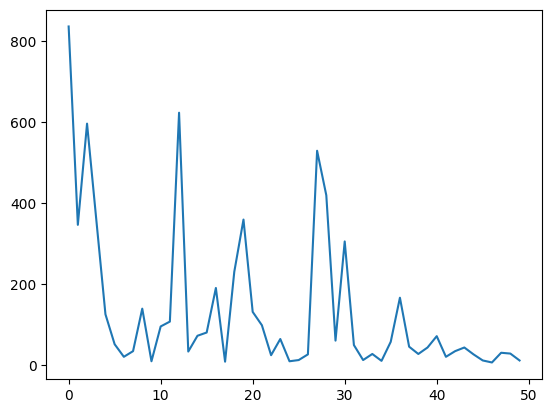

In [48]:
plt.plot(range(50), trend_cnts.values)
plt.show()

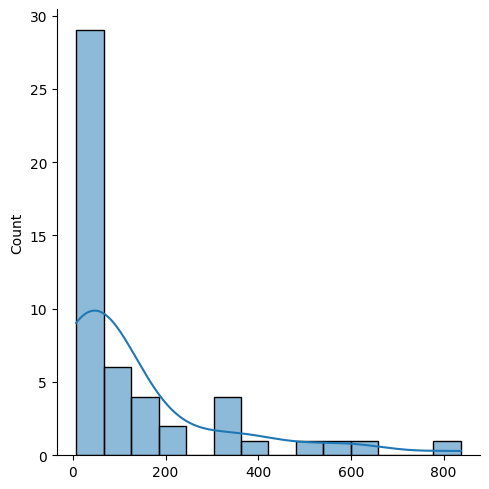

In [49]:
sns.displot(trend_cnts.values kde=True)

In [52]:
trend_cnts.sort_values(ascending=False)

trend_id_res0     837
trend_id_res12    624
trend_id_res2     597
trend_id_res27    530
trend_id_res28    420
trend_id_res3     361
trend_id_res19    360
trend_id_res1     347
trend_id_res30    306
trend_id_res18    231
trend_id_res16    191
trend_id_res36    167
trend_id_res8     140
trend_id_res20    132
trend_id_res4     126
trend_id_res11    108
trend_id_res21     99
trend_id_res10     96
trend_id_res15     81
trend_id_res14     73
trend_id_res40     72
trend_id_res23     65
trend_id_res29     61
trend_id_res35     58
trend_id_res5      52
trend_id_res31     50
trend_id_res37     46
trend_id_res39     44
trend_id_res43     44
trend_id_res42     35
trend_id_res7      35
trend_id_res13     34
trend_id_res47     31
trend_id_res48     29
trend_id_res33     28
trend_id_res38     28
trend_id_res26     27
trend_id_res44     27
trend_id_res22     25
trend_id_res6      21
trend_id_res41     21
trend_id_res25     13
trend_id_res32     13
trend_id_res45     12
trend_id_res49     12
trend_id_r

In [53]:
train_df[['text' 'assessment' 'tags']]

text  assessment  \
0     –ú–∞–ª–µ–Ω—å–∫–∏–π –≤—ã–±–æ—Ä —Ç–æ–≤–∞—Ä–æ–≤, —Ö–æ—Ç–µ–ª–æ—Å—å –±—ã –∞—Å—Å–æ—Ä—Ç–∏–º–µ...         6.0   
1                                                –ë—ã—Å—Ç—Ä–æ         4.0   
2                      –î–æ—Å—Ç–∞–≤–∫–∞ –ø–æ—Å—Ç–æ—è–Ω–Ω–æ –∑–∞–¥–µ—Ä–∂–∏–≤–∞–µ—Ç—Å—è         6.0   
3                    –ù–∞—Ü–µ–Ω–∫–∞ –∏ –∞—Å—Å–æ—Ä—Ç–∏–º–µ–Ω—Ç —Ä–∞—Å—Å—Ç—Ä–∞–∏–≤–∞—é—Ç         6.0   
4     –ú–æ–∂–Ω–æ –Ω–µ–º–Ω–æ–≥–æ —Å–∫–∏–Ω—É—Ç—å –º–∏–Ω–∏–º–∞–ª—å–Ω—É—é —Å—É–º–º—É –∑–∞–∫–∞–∑–∞...         6.0   
...                                                 ...         ...   
4618                             –ü—Ä–∏–≤–µ–∑–ª–∏ –ø—Ä–æ–∫–∏—Å—à–∏–π —Å—É–ø         2.0   
4619                                             –ø–æ–π–¥–µ—Ç         6.0   
4620  –ù–µ –¥–∞—é—Ç –∞–±—É–∑–∏—Ç—å –ø–æ–¥–¥–µ—Ä–∂–∫–∞ –Ω–µ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –¥–µ–Ω—å–≥–∏...         6.0   
4621  –û—á–µ–Ω—å –ø–ª–æ—Ö–∞—è –¥–æ—Å—Ç–∞–≤–∫–∞ –≤ –ø–µ—Ä–≤—É—é –æ—á–µ—Ä–µ–¥—å, –ø–æ—Å—Ç–æ—è...         2.0   
4622  –¥–∏–∫–æ —É–ø–∞—Ä–∏–ª–∞ —Ñ–∏—á–∞ —Å –ø–æ—Å—Ç–æ—è–Ω–Ω–æ –∏–∑–º–µ–Ω—è—é—â–µ–π—Å—è –º–∏–Ω...         3.0   

                                                   tags  
0                      {ASSORTMENT,PROMOTIONS,DELIVERY}  
1          {ASSORTMENT,PRICE,PRODUCTS_QUALITY,DELIVERY}  
2        {DELIVERY,PROMOTIONS,PRICE,ASSORTMENT,SUPPORT}  
3                         {PRICE,PROMOTIONS,ASSORTMENT}  
4                                    {PRICE,PROMOTIONS}  
...                                                 ...  
4618                                 {PRODUCTS_QUALITY}  
4619                                         {DELIVERY}  
4620        {PROMOTIONS,PRICE,SUPPORT,PRODUCTS_QUALITY}  
4621                        {DELIVERY,PRODUCTS_QUALITY}  
4622  {ASSORTMENT,PRICE,PROMOTIONS,DELIVERY,CATALOG_...  

[4623 rows x 3 columns]

In [56]:
['trend_id_res{}'.format(i) for i in range(50)]

['trend_id_res0',
 'trend_id_res1',
 'trend_id_res2',
 'trend_id_res3',
 'trend_id_res4',
 'trend_id_res5',
 'trend_id_res6',
 'trend_id_res7',
 'trend_id_res8',
 'trend_id_res9',
 'trend_id_res10',
 'trend_id_res11',
 'trend_id_res12',
 'trend_id_res13',
 'trend_id_res14',
 'trend_id_res15',
 'trend_id_res16',
 'trend_id_res17',
 'trend_id_res18',
 'trend_id_res19',
 'trend_id_res20',
 'trend_id_res21',
 'trend_id_res22',
 'trend_id_res23',
 'trend_id_res24',
 'trend_id_res25',
 'trend_id_res26',
 'trend_id_res27',
 'trend_id_res28',
 'trend_id_res29',
 'trend_id_res30',
 'trend_id_res31',
 'trend_id_res32',
 'trend_id_res33',
 'trend_id_res34',
 'trend_id_res35',
 'trend_id_res36',
 'trend_id_res37',
 'trend_id_res38',
 'trend_id_res39',
 'trend_id_res40',
 'trend_id_res41',
 'trend_id_res42',
 'trend_id_res43',
 'trend_id_res44',
 'trend_id_res45',
 'trend_id_res46',
 'trend_id_res47',
 'trend_id_res48',
 'trend_id_res49']

In [71]:
train_df[train_df['assessment'] == 3][['assessment', 'text']]# + ['trend_id_res{}'.format(i) for i in range(50)]].iloc[:5].style

assessment                                               text
5            3.0  –û—á–µ–Ω—å –¥–æ–ª–≥–∞—è –¥–æ—Å—Ç–∞–≤–∫–∞, –ø–æ —Ñ–∞–∫—Ç—É –æ–±–µ—â–∞—é—Ç –ø—Ä–∏–≤–µ–∑...
10           3.0             –î–æ—Å—Ç–∞–≤–∫–∞ –∫—Ä–∞–π–Ω–µ —Ä–µ–¥–∫–æ –ø—Ä–∏–µ–∑–∂–∞–µ—Ç –≤ —Å—Ä–æ–∫
21           3.0                            –ü—Ä–æ–≥—Ä–∞–º–º—É –Ω–∞–¥–æ —É–ª—É—á—à–∏—Ç—å
25           3.0                  –ù–µ —Å–ª–µ–¥–∏—Ç–µ –∑–∞ –∫–∞—á–µ—Å—Ç–≤–æ–º –ø—Ä–æ–¥—É–∫—Ç–æ–≤
37           3.0  –ù–µ—Ç –Ω–∏–∫–∞–∫–æ–π —Å–∏—Å—Ç–µ–º—ã –ª–æ—è–ª—å–Ω–æ—Å—Ç–∏ –∫ –ø–æ—Å—Ç–æ—è–Ω–Ω—ã–º –∫–ª...
...          ...                                                ...
4603         3.0                                             –ü—Ä–∏–≤–µ—Ç
4605         3.0  –í —Ü–µ–ª–æ–º –Ω–µ–ø–ª–æ—Ö–æ,–Ω–æ –¥–æ—Å—Ç–∞–≤–∫–∞ —É–∂–µ –¥–∞–≤–Ω–æ –Ω–µ [NUM]...
4614         3.0               –î–æ—Å—Ç–∞–≤–∫–∞ –Ω–∞–º–Ω–æ–≥–æ –¥–æ–ª—å—à–µ, —á–µ–º –æ–±–µ—â–∞–ª–∏
4617         3.0  –ü—Ä–æ–¥—É–∫—Ç—ã –ø—Ä–∏–Ω–æ—Å—è—Ç –Ω–µ –≤—Å–µ–≥–¥–∞ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ, –±–∞–Ω–∞...
4622         3.0  –¥–∏–∫–æ —É–ø–∞—Ä–∏–ª–∞ —Ñ–∏—á–∞ —Å –ø–æ—Å—Ç–æ—è–Ω–Ω–æ –∏–∑–º–µ–Ω—è—é—â–µ–π—Å—è –º–∏–Ω...

[829 rows x 2 columns]

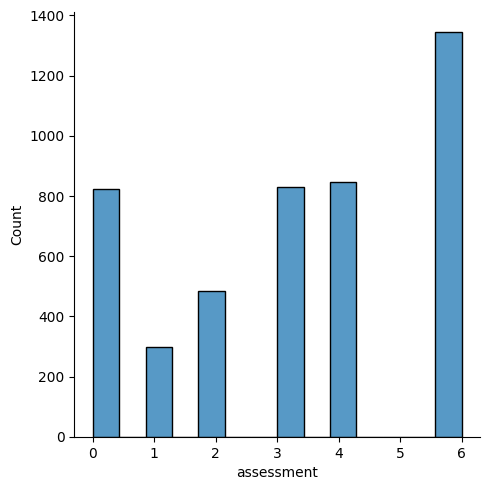

In [74]:
sns.displot(train_df['assessment'])

In [77]:
train_df.iloc[:, 5:].sum(axis=1, numeric_only=True).sort_values(ascending=False)

1597    4
2988    4
4056    4
2373    4
823     4
       ..
1854    1
1855    1
1856    1
1858    1
4622    1
Length: 4623, dtype: int64

In [83]:
train_df.iloc[1597][['assessment', 'text']].values

array([np.float64(6.0),
       '–ù–∏–∫–æ–≥–¥–∞ –∫—É—Ä—å–µ—Ä—ã –Ω–µ —á–∏—Ç–∞—é—Ç –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏ –∫ –∑–∞–∫–∞–∑–∞–º! –í–æ–æ–±—â–µ –Ω–∏–∫–æ–≥–¥–∞! –ù–∏ —Ä–∞–∑—É –∑–∞ –≤—Å–µ –≤—Ä–µ–º—è! –¶–µ–Ω—ã –æ—Å—Ç–∞–≤–ª—è—é—Ç –∂–µ–ª–∞—Ç—å –ª—É—á—à–µ–≥–æ: –æ—á–µ–Ω—å –∑–∞–≤—ã—à–µ–Ω—ã! –ö–∞—Ä—Ç–æ—Ñ–µ–ª—å –ø–æ [NUM]-[NUM] —Ä—É–± –∫–≥! –°–µ—Ä—å–µ–∑–Ω–æ??? –ö–∞—á–µ—Å—Ç–≤–æ –Ω–∞ [NUM] –∏–∑ [NUM]. –ù–µ–≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å —Ä–µ–¥–∞–∫—Ç–∏—Ä–æ–≤–∞—Ç—å –∑–∞–∫–∞–∑, –¥–æ–ª–≥–∏–π –≤–æ–∑–≤—Ä–∞—Ç –¥–µ–Ω–µ–≥'],
      dtype=object)

In [84]:
train_df.iloc[1597]

Unnamed: 0                                                     3000
index                                                         10202
assessment                                                      6.0
tags              {ASSORTMENT,PRODUCTS_QUALITY,PRICE,PROMOTIONS,...
text              –ù–∏–∫–æ–≥–¥–∞ –∫—É—Ä—å–µ—Ä—ã –Ω–µ —á–∏—Ç–∞—é—Ç –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏ –∫ –∑–∞–∫–∞–∑–∞...
trend_id_res0                                                     0
trend_id_res1                                                     0
trend_id_res2                                                     0
trend_id_res3                                                     0
trend_id_res4                                                     0
trend_id_res5                                                     0
trend_id_res6                                                     0
trend_id_res7                                                     0
trend_id_res8                                                     0
trend_id

<Axes: >

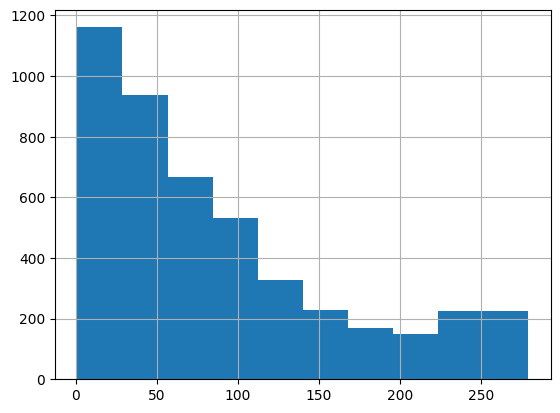

In [85]:
train_df['text'].str.len().hist()

In [89]:
train_df

Unnamed: 0  index  assessment  \
0              0   5652         6.0   
1              1  18092         4.0   
2              2  13845         6.0   
3              3  25060         6.0   
4              5   1428         6.0   
...          ...    ...         ...   
4618        8701  26325         2.0   
4619        8703    661         6.0   
4620        8704   1870         6.0   
4621        8705  22650         2.0   
4622        8707  21025         3.0   

                                                   tags  \
0                      {ASSORTMENT,PROMOTIONS,DELIVERY}   
1          {ASSORTMENT,PRICE,PRODUCTS_QUALITY,DELIVERY}   
2        {DELIVERY,PROMOTIONS,PRICE,ASSORTMENT,SUPPORT}   
3                         {PRICE,PROMOTIONS,ASSORTMENT}   
4                                    {PRICE,PROMOTIONS}   
...                                                 ...   
4618                                 {PRODUCTS_QUALITY}   
4619                                         {DELIVERY}   
4620        {PROMOTIONS,PRICE,SUPPORT,PRODUCTS_QUALITY}   
4621                        {DELIVERY,PRODUCTS_QUALITY}   
4622  {ASSORTMENT,PRICE,PROMOTIONS,DELIVERY,CATALOG_...   

                                                   text  trend_id_res0  \
0     –ú–∞–ª–µ–Ω—å–∫–∏–π –≤—ã–±–æ—Ä —Ç–æ–≤–∞—Ä–æ–≤, —Ö–æ—Ç–µ–ª–æ—Å—å –±—ã –∞—Å—Å–æ—Ä—Ç–∏–º–µ...              0   
1                                                –ë—ã—Å—Ç—Ä–æ              0   
2                      –î–æ—Å—Ç–∞–≤–∫–∞ –ø–æ—Å—Ç–æ—è–Ω–Ω–æ –∑–∞–¥–µ—Ä–∂–∏–≤–∞–µ—Ç—Å—è              0   
3                    –ù–∞—Ü–µ–Ω–∫–∞ –∏ –∞—Å—Å–æ—Ä—Ç–∏–º–µ–Ω—Ç —Ä–∞—Å—Å—Ç—Ä–∞–∏–≤–∞—é—Ç              0   
4     –ú–æ–∂–Ω–æ –Ω–µ–º–Ω–æ–≥–æ —Å–∫–∏–Ω—É—Ç—å –º–∏–Ω–∏–º–∞–ª—å–Ω—É—é —Å—É–º–º—É –∑–∞–∫–∞–∑–∞...              0   
...                                                 ...            ...   
4618                             –ü—Ä–∏–≤–µ–∑–ª–∏ –ø—Ä–æ–∫–∏—Å—à–∏–π —Å—É–ø              0   
4619                                             –ø–æ–π–¥–µ—Ç              0   
4620  –ù–µ –¥–∞—é—Ç –∞–±—É–∑–∏—Ç—å –ø–æ–¥–¥–µ—Ä–∂–∫–∞ –Ω–µ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –¥–µ–Ω—å–≥–∏...              0   
4621  –û—á–µ–Ω—å –ø–ª–æ—Ö–∞—è –¥–æ—Å—Ç–∞–≤–∫–∞ –≤ –ø–µ—Ä–≤—É—é –æ—á–µ—Ä–µ–¥—å, –ø–æ—Å—Ç–æ—è...              1   
4622  –¥–∏–∫–æ —É–ø–∞—Ä–∏–ª–∞ —Ñ–∏—á–∞ —Å –ø–æ—Å—Ç–æ—è–Ω–Ω–æ –∏–∑–º–µ–Ω—è—é—â–µ–π—Å—è –º–∏–Ω...              0   

      trend_id_res1  trend_id_res2  trend_id_res3  trend_id_res4  ...  \
0                 0              0              0              0  ...   
1                 0              0              0              0  ...   
2                 0              0              1              0  ...   
3                 0              0              0              0  ...   
4                 0              0              0              0  ...   
...             ...            ...            ...            ...  ...   
4618              0              0              0              0  ...   
4619              0              0              0              0  ...   
4620              0              0              0              0  ...   
4621              0              0              0              0  ...   
4622              0              0              0              0  ...   

      trend_id_res40  trend_id_res41  trend_id_res42  trend_id_res43  \
0                  0               0               0               0   
1                  0               0               0               0   
2                  0               0               0               0   
3                  0               0               0               0   
4                  0               0               0               0   
...              ...             ...             ...             ...   
4618               1               0               0               0   
4619               0               0               0               0   
4620               0               0               0               0   
4621               1               0             

In [108]:
train_df['text'].str.len().sort_values().index

Index([1847, 1271, 4323, 1796, 4322,  490, 3480, 3856,  520, 1843,
       ...
        139,  981,  974, 3709,  938, 1968, 2061, 3377, 4327, 1998],
      dtype='int64', length=4623)

In [107]:
train_df[train_df['trend_id_res0'] == 1][['assessment','text', 'tags']].iloc[:10].style

In [109]:
train_df.iloc[train_df['text'].str.len().sort_values().index]

Unnamed: 0  index  assessment  \
1847        3451  18903         0.0   
1271        2398   1529         0.0   
4323        8143  21595         2.0   
1796        3357   9362         2.0   
4322        8142    221         6.0   
...          ...    ...         ...   
1968        3696  21560         6.0   
2061        3895  20790         4.0   
3377        6369  20217         6.0   
4327        8156  11858         3.0   
1998        3750  15495         2.0   

                                                   tags  \
1847  {PRODUCTS_QUALITY,PRICE,PROMOTIONS,DELIVERY,SU...   
1271                                         {DELIVERY}   
4323  {ASSORTMENT,PRODUCTS_QUALITY,PRICE,PROMOTIONS,...   
1796     {ASSORTMENT,PRICE,PRODUCTS_QUALITY,PROMOTIONS}   
4322  {ASSORTMENT,PRODUCTS_QUALITY,PAYMENT,DELIVERY,...   
...                                                 ...   
1968  {ASSORTMENT,PRODUCTS_QUALITY,PRICE,PROMOTIONS,...   
2061                              {ASSORTMENT,DELIVERY}   
3377                              {DELIVERY,PROMOTIONS}   
4327                                 {SUPPORT,DELIVERY}   
1998                        {PRICE,PROMOTIONS,DELIVERY}   

                                                   text  trend_id_res0  \
1847                                                  ‚Ä¶              0   
1271                                                  –ì              0   
4323                                                  .              0   
1796                                                  -              0   
4322                                                  –ù              0   
...                                                 ...            ...   
1968  –°–µ—Ä–≤–∏—Å –ø–æ–¥–∏—Å–ø–æ—Ä—Ç–∏–ª—Å—è-—Å—Ç–∞–ª–∞ –¥–æ–ª–≥–∞—è –¥–æ—Å—Ç–∞–≤–∫–∞ [NU...              0   
2061  –í—Ä–µ–º—è –¥–æ—Å—Ç–∞–≤–∫–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏—á–µ—Å–∫–∏ –Ω–µ —Å–æ–±–ª—é–¥–∞–µ—Ç—Å—è. –ü...              0   
3377  –û—á–µ–Ω—å —á–∞—Å—Ç–æ –∑–∞–¥–µ—Ä–∂–∏–≤–∞–µ—Ç—Å—è –¥–æ—Å—Ç–∞–≤–∫–∞ –∑–∞–∫–∞–∑–∞. –ë—ã–≤...              0   
4327  –û–±–º–∞–Ω[NUM]-–ó–∞—á–µ–º —É–∫–∞–∑—ã–≤–∞—Ç—å, —á—Ç–æ –¥–æ—Å—Ç–∞–≤–∫–∞ [NUM]...              0   
1998  [NUM].–î–æ—Å—Ç–∞–≤–∫–∞ –Ω–µ –≤—Å–µ–≥–¥–∞ –±—ã—Å—Ç—Ä–∞—è, –∫–∞–∫ –ø–∏—à—É—Ç –Ω–∞...              0   

      trend_id_res1  trend_id_res2  trend_id_res3  trend_id_res4  ...  \
1847              0              0              0              0  ...   
1271              0              0              0              0  ...   
4323              0              0              0              0  ...   
1796              0              0              0              0  ...   
4322              0              0              0              0  ...   
...             ...            ...            ...            ...  ...   
1968              1              0              0              0  ...   
2061              0              1              0              0  ...   
3377              0              0              1              0  ...   
4327              0              1              0              0  ...   
1998              0              1              0              0  ...   

      trend_id_res40  trend_id_res41  trend_id_res42  trend_id_res43  \
1847               0               0               0               0   
1271               0               0               0               0   
4323               0               0               0               0   
1796               0               0               0               0   
4322               0               0               0               0   
...              ...             ...             ...             ...   
1968               0               0               0               0   
2061               0               0               0               0   
3377               0               0               0               0   
4327               0               0               0               0   
1998               0               0               0               0   

      trend_

In [127]:
uniques_df = train_df.groupby('text')['index'].nunique()

In [135]:
train_df.groupby('text').nunique()

Unnamed: 0  index  \
text                                                                    
!                                                            1      1   
!!!!                                                         1      1   
"–ó–∞ [NUM] –º–∏–Ω—É—Ç –¥–æ –¥–æ–º–∞" –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ –Ω–∞—á–∞–ª–∏ –ø—Ä–µ–≤...           1      1   
(                                                            1      1   
+ –±—ã—Å—Ç—Ä–∞—è –¥–æ—Å—Ç–∞–≤–∫–∞. -–≤—ã—Å–æ–∫–∏–µ —Ü–µ–Ω—ã, –º–∞–ª–µ–Ω—å–∫–∏–π –∞—Å...           1      1   
...                                                        ...    ...   
ü§∑‚Äç‚ôÇÔ∏è                                                         1      1   
ü•≤                                                            2      2   
ü¶â                                                            1      1   
ü´§                                                            1      1   
ü´∞                                                            1      1   

                                                    assessment  tags  \
text                                                                   
!                                                            1     1   
!!!!                                                         1     1   
"–ó–∞ [NUM] –º–∏–Ω—É—Ç –¥–æ –¥–æ–º–∞" –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ –Ω–∞—á–∞–ª–∏ –ø—Ä–µ–≤...           1     1   
(                                                            1     1   
+ –±—ã—Å—Ç—Ä–∞—è –¥–æ—Å—Ç–∞–≤–∫–∞. -–≤—ã—Å–æ–∫–∏–µ —Ü–µ–Ω—ã, –º–∞–ª–µ–Ω—å–∫–∏–π –∞—Å...           1     1   
...                                                        ...   ...   
ü§∑‚Äç‚ôÇÔ∏è                                                         1     1   
ü•≤                                                            1     2   
ü¶â                                                            1     1   
ü´§                                                            1     1   
ü´∞                                                            1     1   

                                                    trend_id_res0  \
text                                                                
!                                                               1   
!!!!                                                            1   
"–ó–∞ [NUM] –º–∏–Ω—É—Ç –¥–æ –¥–æ–º–∞" –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ –Ω–∞—á–∞–ª–∏ –ø—Ä–µ–≤...              1   
(                                                               1   
+ –±—ã—Å—Ç—Ä–∞—è –¥–æ—Å—Ç–∞–≤–∫–∞. -–≤—ã—Å–æ–∫–∏–µ —Ü–µ–Ω—ã, –º–∞–ª–µ–Ω—å–∫–∏–π –∞—Å...              1   
...                                                           ...   
ü§∑‚Äç‚ôÇÔ∏è                                                            1   
ü•≤                                                               1   
ü¶â                                                               1   
ü´§                                                               1   
ü´∞                                                               1   

                                                    trend_id_res1  \
text                                                                
!                                                               1   
!!!!                                                            1   
"–ó–∞ [NUM] –º–∏–Ω—É—Ç –¥–æ –¥–æ–º–∞" –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ –Ω–∞—á–∞–ª–∏ –ø—Ä–µ–≤...              1   
(                                                               1   
+ –±—ã—Å—Ç—Ä–∞—è –¥–æ—Å—Ç–∞–≤–∫–∞. -–≤—ã—Å–æ–∫–∏–µ —Ü–µ–Ω—ã, –º–∞–ª–µ–Ω—å–∫–∏–π –∞—Å...              1   
...                                                           ...   
ü§∑‚Äç‚ôÇÔ∏è                                                            1   
ü•≤                                                               1   
ü¶â                                                               1   
ü´§                                                               1   
ü´∞                                                               1   

     

In [131]:
uniques_df

text
!                                                                                                                                                                                           1
!!!!                                                                                                                                                                                        1
"–ó–∞ [NUM] –º–∏–Ω—É—Ç –¥–æ –¥–æ–º–∞" –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ –Ω–∞—á–∞–ª–∏ –ø—Ä–µ–≤—Ä–∞—â–∞—Ç—å—Å—è –≤ "–ù—É [NUM]-[NUM] –º–∏–Ω—É—Ç–æ–∫...". –í–µ—Ä–æ—è—Ç–Ω–æ —É–≤–µ–ª–∏—á–∏–ª–æ—Å—å —á–∏—Å–ª–æ –∑–∞–∫–∞–∑–æ–≤, –Ω–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫—É—Ä—å–µ—Ä–æ–≤ –Ω–µ –ø–æ—Å–ø–µ–≤–∞–µ—Ç –∑–∞ –∏–∑–º–µ–Ω–µ–Ω–∏—è–º–∏, who knows    1
(                                                                                                                                                                                           1
+ –±—ã—Å—Ç—Ä–∞—è –¥–æ—Å—Ç–∞–≤–∫–∞. -–≤—ã—Å–æ–∫–∏–µ —Ü–µ–Ω—ã, –º–∞–ª–µ–Ω—å–∫–∏–π –∞—Å—Å–æ—Ä—Ç–∏–º–µ–Ω—Ç, –Ω–µ–

In [143]:
sub_uniqs_df = (
    train_df[train_df['text'].isin(uniques_df[uniques_df > 1].index)].sort_values(by='text')
    .groupby('text')
    .sum()
    [[f"trend_id_res{i}" for i in range(50)]]
)

In [152]:
print(',\n| '.join([f'(sub_uniqs_df["trend_id_res{i}"] == 1)' for i in range(50)]))

(sub_uniqs_df["trend_id_res0"] == 1)
| (sub_uniqs_df["trend_id_res1"] == 1)
| (sub_uniqs_df["trend_id_res2"] == 1)
| (sub_uniqs_df["trend_id_res3"] == 1)
| (sub_uniqs_df["trend_id_res4"] == 1)
| (sub_uniqs_df["trend_id_res5"] == 1)
| (sub_uniqs_df["trend_id_res6"] == 1)
| (sub_uniqs_df["trend_id_res7"] == 1)
| (sub_uniqs_df["trend_id_res8"] == 1)
| (sub_uniqs_df["trend_id_res9"] == 1)
| (sub_uniqs_df["trend_id_res10"] == 1)
| (sub_uniqs_df["trend_id_res11"] == 1)
| (sub_uniqs_df["trend_id_res12"] == 1)
| (sub_uniqs_df["trend_id_res13"] == 1)
| (sub_uniqs_df["trend_id_res14"] == 1)
| (sub_uniqs_df["trend_id_res15"] == 1)
| (sub_uniqs_df["trend_id_res16"] == 1)
| (sub_uniqs_df["trend_id_res17"] == 1)
| (sub_uniqs_df["trend_id_res18"] == 1)
| (sub_uniqs_df["trend_id_res19"] == 1)
| (sub_uniqs_df["trend_id_res20"] == 1)
| (sub_uniqs_df["trend_id_res21"] == 1)
| (sub_uniqs_df["trend_id_res22"] == 1)
| (sub_uniqs_df["trend_id_res23"] == 1)
| (sub_uniqs_df["trend_id_res24"] == 1)
| (sub_uniqs

In [174]:
wrong_indexes = train_df[train_df['text'].isin(sub_uniqs_df[
    (sub_uniqs_df["trend_id_res0"] == 1)
    | (sub_uniqs_df["trend_id_res1"] == 1)
    | (sub_uniqs_df["trend_id_res2"] == 1)
    | (sub_uniqs_df["trend_id_res3"] == 1)
    | (sub_uniqs_df["trend_id_res4"] == 1)
    | (sub_uniqs_df["trend_id_res5"] == 1)
    | (sub_uniqs_df["trend_id_res6"] == 1)
    | (sub_uniqs_df["trend_id_res7"] == 1)
    | (sub_uniqs_df["trend_id_res8"] == 1)
    | (sub_uniqs_df["trend_id_res9"] == 1)
    | (sub_uniqs_df["trend_id_res10"] == 1)
    | (sub_uniqs_df["trend_id_res11"] == 1)
    | (sub_uniqs_df["trend_id_res12"] == 1)
    | (sub_uniqs_df["trend_id_res13"] == 1)
    | (sub_uniqs_df["trend_id_res14"] == 1)
    | (sub_uniqs_df["trend_id_res15"] == 1)
    | (sub_uniqs_df["trend_id_res16"] == 1)
    | (sub_uniqs_df["trend_id_res17"] == 1)
    | (sub_uniqs_df["trend_id_res18"] == 1)
    | (sub_uniqs_df["trend_id_res19"] == 1)
    | (sub_uniqs_df["trend_id_res20"] == 1)
    | (sub_uniqs_df["trend_id_res21"] == 1)
    | (sub_uniqs_df["trend_id_res22"] == 1)
    | (sub_uniqs_df["trend_id_res23"] == 1)
    | (sub_uniqs_df["trend_id_res24"] == 1)
    | (sub_uniqs_df["trend_id_res25"] == 1)
    | (sub_uniqs_df["trend_id_res26"] == 1)
    | (sub_uniqs_df["trend_id_res27"] == 1)
    | (sub_uniqs_df["trend_id_res28"] == 1)
    | (sub_uniqs_df["trend_id_res29"] == 1)
    | (sub_uniqs_df["trend_id_res30"] == 1)
    | (sub_uniqs_df["trend_id_res31"] == 1)
    | (sub_uniqs_df["trend_id_res32"] == 1)
    | (sub_uniqs_df["trend_id_res33"] == 1)
    | (sub_uniqs_df["trend_id_res34"] == 1)
    | (sub_uniqs_df["trend_id_res35"] == 1)
    | (sub_uniqs_df["trend_id_res36"] == 1)
    | (sub_uniqs_df["trend_id_res37"] == 1)
    | (sub_uniqs_df["trend_id_res38"] == 1)
    | (sub_uniqs_df["trend_id_res39"] == 1)
    | (sub_uniqs_df["trend_id_res40"] == 1)
    | (sub_uniqs_df["trend_id_res41"] == 1)
    | (sub_uniqs_df["trend_id_res42"] == 1)
    | (sub_uniqs_df["trend_id_res43"] == 1)
    | (sub_uniqs_df["trend_id_res44"] == 1)
    | (sub_uniqs_df["trend_id_res45"] == 1)
    | (sub_uniqs_df["trend_id_res46"] == 1)
    | (sub_uniqs_df["trend_id_res47"] == 1)
    | (sub_uniqs_df["trend_id_res48"] == 1)
    | (sub_uniqs_df["trend_id_res49"] == 1)
].index)].sort_values('text')['index'].values
# [18092, 21908, 27017, 10457, 23353, 21522, 24904, 10914, 7606, 15618, 23075, 1605, 11964, 20857, 24331, 21702]

In [168]:
wrong_indexes_2 = [i for i in wrong_indexes if i not in [18092, 21908, 27017, 10457, 23353, 21522, 24904, 10914, 7606, 15618, 23075, 1605, 11964, 20857, 24331, 21702]]

In [172]:
train_df[~train_df['index'].isin(wrong_indexes_2)].to_csv('data/train_df_clean.csv', index=False)

In [178]:
train_df[train_df['text'].isin(sub_uniqs_df[
    (sub_uniqs_df["trend_id_res0"] == 1)
    | (sub_uniqs_df["trend_id_res1"] == 1)
    | (sub_uniqs_df["trend_id_res2"] == 1)
    | (sub_uniqs_df["trend_id_res3"] == 1)
    | (sub_uniqs_df["trend_id_res4"] == 1)
    | (sub_uniqs_df["trend_id_res5"] == 1)
    | (sub_uniqs_df["trend_id_res6"] == 1)
    | (sub_uniqs_df["trend_id_res7"] == 1)
    | (sub_uniqs_df["trend_id_res8"] == 1)
    | (sub_uniqs_df["trend_id_res9"] == 1)
    | (sub_uniqs_df["trend_id_res10"] == 1)
    | (sub_uniqs_df["trend_id_res11"] == 1)
    | (sub_uniqs_df["trend_id_res12"] == 1)
    | (sub_uniqs_df["trend_id_res13"] == 1)
    | (sub_uniqs_df["trend_id_res14"] == 1)
    | (sub_uniqs_df["trend_id_res15"] == 1)
    | (sub_uniqs_df["trend_id_res16"] == 1)
    | (sub_uniqs_df["trend_id_res17"] == 1)
    | (sub_uniqs_df["trend_id_res18"] == 1)
    | (sub_uniqs_df["trend_id_res19"] == 1)
    | (sub_uniqs_df["trend_id_res20"] == 1)
    | (sub_uniqs_df["trend_id_res21"] == 1)
    | (sub_uniqs_df["trend_id_res22"] == 1)
    | (sub_uniqs_df["trend_id_res23"] == 1)
    | (sub_uniqs_df["trend_id_res24"] == 1)
    | (sub_uniqs_df["trend_id_res25"] == 1)
    | (sub_uniqs_df["trend_id_res26"] == 1)
    | (sub_uniqs_df["trend_id_res27"] == 1)
    | (sub_uniqs_df["trend_id_res28"] == 1)
    | (sub_uniqs_df["trend_id_res29"] == 1)
    | (sub_uniqs_df["trend_id_res30"] == 1)
    | (sub_uniqs_df["trend_id_res31"] == 1)
    | (sub_uniqs_df["trend_id_res32"] == 1)
    | (sub_uniqs_df["trend_id_res33"] == 1)
    | (sub_uniqs_df["trend_id_res34"] == 1)
    | (sub_uniqs_df["trend_id_res35"] == 1)
    | (sub_uniqs_df["trend_id_res36"] == 1)
    | (sub_uniqs_df["trend_id_res37"] == 1)
    | (sub_uniqs_df["trend_id_res38"] == 1)
    | (sub_uniqs_df["trend_id_res39"] == 1)
    | (sub_uniqs_df["trend_id_res40"] == 1)
    | (sub_uniqs_df["trend_id_res41"] == 1)
    | (sub_uniqs_df["trend_id_res42"] == 1)
    | (sub_uniqs_df["trend_id_res43"] == 1)
    | (sub_uniqs_df["trend_id_res44"] == 1)
    | (sub_uniqs_df["trend_id_res45"] == 1)
    | (sub_uniqs_df["trend_id_res46"] == 1)
    | (sub_uniqs_df["trend_id_res47"] == 1)
    | (sub_uniqs_df["trend_id_res48"] == 1)
    | (sub_uniqs_df["trend_id_res49"] == 1)
].index)].sort_values(['text', 'assessment']).style
# [18092, 21908, 27017, 10457, 23353, 21522, 24904, 10914, 7606, 15618, 23075, 1605, 11964, 20857, 24331, 21702]

In [180]:
pd.read_csv('data/test.csv')['assessment'].value_counts()

assessment
6.0    2653
0.0    1648
3.0    1603
4.0    1579
2.0     963
1.0     569
Name: count, dtype: int64

In [204]:
pd.read_csv('data/test.csv')

Unnamed: 0  index  assessment                                      tags  \
0              1   3135         3.0                                {DELIVERY}   
1              3   4655         2.0               {PRICE,DELIVERY,ASSORTMENT}   
2              5  22118         2.0  {CATALOG_NAVIGATION,ASSORTMENT,DELIVERY}   
3              7  23511         0.0                                {DELIVERY}   
4              8     45         6.0                   {ASSORTMENT,PROMOTIONS}   
...          ...    ...         ...                                       ...   
9010       16992   3523         3.0                  {PRICE,SUPPORT,DELIVERY}   
9011       16993  24925         6.0       {PRICE,PRODUCTS_QUALITY,ASSORTMENT}   
9012       16994   6327         6.0             {PAYMENT,ASSORTMENT,DELIVERY}   
9013       16997    530         3.0       {PRODUCTS_QUALITY,SUPPORT,DELIVERY}   
9014       16998  20221         6.0    {ASSORTMENT,PRICE,PROMOTIONS,DELIVERY}   

                                                   text  
0     –ü–æ—Å–ª–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è –¥—É–º–∞—é –ø–ª–æ—Ö–æ, —Å—Ä–æ–∫–∏ –¥–æ—Å—Ç–∞–≤–∫–∏ –¥–∞...  
1          –¶–µ–Ω—ã –Ω–∞–º–Ω–æ–≥–æ –≤—ã—à–µ –º–∞–≥–∞–∑–∏–Ω–Ω—ã—Ö –Ω–æ —Ä–∞–¥—É—é—Ç –∞–∫—Ü–∏–∏  
2     –î–æ—Å—Ç–∞–≤–∫–∞ –∑–∞ [NUM] –º–∏–Ω—É—Ç, –∑–∞–∫–∞–∑ –¥–∞–∂–µ –Ω–µ –Ω–∞—á–∞–ª–∏ ...  
3                                –£–∂–∞—Å–Ω–æ –¥–æ–ª–≥–∞—è –¥–æ—Å—Ç–∞–≤–∫–∞  
4     –î–æ–±—Ä—ã–π –≤–µ—á–µ—Ä! –í—ã –±–æ–ª—å—à–∏–µ –º–æ–ª–æ–¥—Ü—ã. –ú–µ–Ω—è –≤—Å—ë —É—Å—Ç...  
...                                                 ...  
9010  –ó–∞–¥–µ—Ä–∂–∫–∞ —Å –¥–æ—Å—Ç–∞–≤–∫–æ–π –Ω–µ –¥–∞–µ—Ç–µ –ø—Ä–æ–º–æ–∫–æ–¥ –Ω–∞ —Å–∫–∏–¥...  
9011  –û—á–µ–Ω—å —É–¥–æ–±–Ω—ã–π —Ñ–æ—Ä–º–∞—Ç —Å–µ—Ä–≤–∏—Å–∞ –∏ –æ—á–µ–Ω—å –º–∞–ª–µ–Ω—å–∫–∏–π...  
9012  –°—É–º–º–∞ –∑–∞–∫–∞–∑–∞ –ø–æ—á—Ç–∏ –≤—Å–µ–≥–¥–∞ –≤—ã—Å–æ–∫–∞—è, —á—Ç–æ –∑–∞—á–∞—Å—Ç—É...  
9013  –ß–∞—Å—Ç–æ, –∑–∞–∫–∞–∑—ã–≤–∞—é —É –≤–∞—Å –º–æ–ª–æ—á–Ω—É—é –ø—Ä–æ–¥—É–∫—Ü–∏—é, –ø—Ä–∏...  
9014  –ò–∑–Ω–∞—á–∞–ª—å–Ω–æ –ø–æ–¥–∫—É–ø–∞–ª–æ —Ç–æ, —á—Ç–æ –∑–∞–∫–∞–∑ –æ—Ç [NUM] —Ä—É...  

[9015 rows x 5 columns]

In [237]:
(
    pd.read_csv('data/test.csv')
    .groupby('index')
    # .apply(lambda x: print(x['text'].item()))
    .apply(
        lambda x: emoji.demojize(str(x['text'].item()), language='ru').replace(':', '').replace('_', ' ')
    )
    .sort_values(key=lambda col: col.str.len())
    .iloc[:50]
)

/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_54687/3606067956.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pd.read_csv('data/test.csv')


index
7875     -
12901    .
3330     .
5017     –Ø
25931    .
1834     .
26816    –ú
5391     .
9773     —ã
6473     .
23274    (
20688    -
21950    .
25445    Z
25396    .
25381    –û
21942    –Ø
15781    –¢
21310    .
24522    ‚Ä¶
26603    !
26701    –æ
26574    -
8678     -
13513    .
25345    -
7590     .
21298    .
21222    )
20753    –≥
21215    .
20961    .
22099    —à
25664    .
15438    –¢
22092    .
12261    (
9236     .
21035    -
3783     .
17779    .
21056    .
9118     .
15381    .
282      –û
15344    ‚Ä¶
21090    .
20825    !
25820    .
11927    .
dtype: object

In [196]:
demoji.set_emoji_pattern

''

In [232]:
emoji.demojize('asdasdas ü´°', language='ru')

'asdasdas :–≤–æ–∏–Ω—Å–∫–æ–µ_–ø—Ä–∏–≤–µ—Ç—Å—Ç–≤–∏–µ:'

In [5]:
train_df_clean = pd.read_csv('data/train_df_clean.csv')

In [265]:
train_df_clean['text'] = (
    train_df_clean['text']
    .apply(lambda x: emoji.demojize(x, language='ru').replace("_", " "))
    .sort_values(key=lambda col: col.str.len())
)

In [266]:
train_df_clean.to_csv('data/train_df_demojitized.csv')

In [267]:
train_df_clean

Unnamed: 0  index  assessment  \
0              0   5652         6.0   
1              1  18092         4.0   
2              2  13845         6.0   
3              3  25060         6.0   
4              5   1428         6.0   
...          ...    ...         ...   
4576        8701  26325         2.0   
4577        8703    661         6.0   
4578        8704   1870         6.0   
4579        8705  22650         2.0   
4580        8707  21025         3.0   

                                                   tags  \
0                      {ASSORTMENT,PROMOTIONS,DELIVERY}   
1          {ASSORTMENT,PRICE,PRODUCTS_QUALITY,DELIVERY}   
2        {DELIVERY,PROMOTIONS,PRICE,ASSORTMENT,SUPPORT}   
3                         {PRICE,PROMOTIONS,ASSORTMENT}   
4                                    {PRICE,PROMOTIONS}   
...                                                 ...   
4576                                 {PRODUCTS_QUALITY}   
4577                                         {DELIVERY}   
4578        {PROMOTIONS,PRICE,SUPPORT,PRODUCTS_QUALITY}   
4579                        {DELIVERY,PRODUCTS_QUALITY}   
4580  {ASSORTMENT,PRICE,PROMOTIONS,DELIVERY,CATALOG_...   

                                                   text  trend_id_res0  \
0     –ú–∞–ª–µ–Ω—å–∫–∏–π –≤—ã–±–æ—Ä —Ç–æ–≤–∞—Ä–æ–≤, —Ö–æ—Ç–µ–ª–æ—Å—å –±—ã –∞—Å—Å–æ—Ä—Ç–∏–º–µ...              0   
1                                                –ë—ã—Å—Ç—Ä–æ              0   
2                      –î–æ—Å—Ç–∞–≤–∫–∞ –ø–æ—Å—Ç–æ—è–Ω–Ω–æ –∑–∞–¥–µ—Ä–∂–∏–≤–∞–µ—Ç—Å—è              0   
3                    –ù–∞—Ü–µ–Ω–∫–∞ –∏ –∞—Å—Å–æ—Ä—Ç–∏–º–µ–Ω—Ç —Ä–∞—Å—Å—Ç—Ä–∞–∏–≤–∞—é—Ç              0   
4     –ú–æ–∂–Ω–æ –Ω–µ–º–Ω–æ–≥–æ —Å–∫–∏–Ω—É—Ç—å –º–∏–Ω–∏–º–∞–ª—å–Ω—É—é —Å—É–º–º—É –∑–∞–∫–∞–∑–∞...              0   
...                                                 ...            ...   
4576                             –ü—Ä–∏–≤–µ–∑–ª–∏ –ø—Ä–æ–∫–∏—Å—à–∏–π —Å—É–ø              0   
4577                                             –ø–æ–π–¥–µ—Ç              0   
4578  –ù–µ –¥–∞—é—Ç –∞–±—É–∑–∏—Ç—å –ø–æ–¥–¥–µ—Ä–∂–∫–∞ –Ω–µ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –¥–µ–Ω—å–≥–∏...              0   
4579  –û—á–µ–Ω—å –ø–ª–æ—Ö–∞—è –¥–æ—Å—Ç–∞–≤–∫–∞ –≤ –ø–µ—Ä–≤—É—é –æ—á–µ—Ä–µ–¥—å, –ø–æ—Å—Ç–æ—è...              1   
4580  –¥–∏–∫–æ —É–ø–∞—Ä–∏–ª–∞ —Ñ–∏—á–∞ —Å –ø–æ—Å—Ç–æ—è–Ω–Ω–æ –∏–∑–º–µ–Ω—è—é—â–µ–π—Å—è –º–∏–Ω...              0   

      trend_id_res1  trend_id_res2  trend_id_res3  trend_id_res4  ...  \
0                 0              0              0              0  ...   
1                 0              0              0              0  ...   
2                 0              0              1              0  ...   
3                 0              0              0              0  ...   
4                 0              0              0              0  ...   
...             ...            ...            ...            ...  ...   
4576              0              0              0              0  ...   
4577              0              0              0              0  ...   
4578              0              0              0              0  ...   
4579              0              0              0              0  ...   
4580              0              0              0              0  ...   

      trend_id_res40  trend_id_res41  trend_id_res42  trend_id_res43  \
0                  0               0               0               0   
1                  0               0               0               0   
2                  0               0               0               0   
3                  0               0               0               0   
4                  0               0               0               0   
...              ...             ...             ...             ...   
4576               1               0               0               0   
4577               0               0               0               0   
4578               0               0               0               0   
4579               1               0             

In [268]:
trend_cnts.sort_values(ascending=True)

trend_id_res46      7
trend_id_res17      9
trend_id_res24     10
trend_id_res9      10
trend_id_res34     11
trend_id_res45     12
trend_id_res49     12
trend_id_res25     13
trend_id_res32     13
trend_id_res41     21
trend_id_res6      21
trend_id_res22     25
trend_id_res26     27
trend_id_res44     27
trend_id_res38     28
trend_id_res33     28
trend_id_res48     29
trend_id_res47     31
trend_id_res13     34
trend_id_res7      35
trend_id_res42     35
trend_id_res39     44
trend_id_res43     44
trend_id_res37     46
trend_id_res31     50
trend_id_res5      52
trend_id_res35     58
trend_id_res29     61
trend_id_res23     65
trend_id_res40     72
trend_id_res14     73
trend_id_res15     81
trend_id_res10     96
trend_id_res21     99
trend_id_res11    108
trend_id_res4     126
trend_id_res20    132
trend_id_res8     140
trend_id_res36    167
trend_id_res16    191
trend_id_res18    231
trend_id_res30    306
trend_id_res1     347
trend_id_res19    360
trend_id_res3     361
trend_id_r

In [285]:
print(',\n& '.join([f'(train_df_clean["trend_id_res{i}"] == 0)' for i in range(50)]))

(train_df_clean["trend_id_res0"] == 0)
& (train_df_clean["trend_id_res1"] == 0)
& (train_df_clean["trend_id_res2"] == 0)
& (train_df_clean["trend_id_res3"] == 0)
& (train_df_clean["trend_id_res4"] == 0)
& (train_df_clean["trend_id_res5"] == 0)
& (train_df_clean["trend_id_res6"] == 0)
& (train_df_clean["trend_id_res7"] == 0)
& (train_df_clean["trend_id_res8"] == 0)
& (train_df_clean["trend_id_res9"] == 0)
& (train_df_clean["trend_id_res10"] == 0)
& (train_df_clean["trend_id_res11"] == 0)
& (train_df_clean["trend_id_res12"] == 0)
& (train_df_clean["trend_id_res13"] == 0)
& (train_df_clean["trend_id_res14"] == 0)
& (train_df_clean["trend_id_res15"] == 0)
& (train_df_clean["trend_id_res16"] == 0)
& (train_df_clean["trend_id_res17"] == 0)
& (train_df_clean["trend_id_res18"] == 0)
& (train_df_clean["trend_id_res19"] == 0)
& (train_df_clean["trend_id_res20"] == 0)
& (train_df_clean["trend_id_res21"] == 0)
& (train_df_clean["trend_id_res22"] == 0)
& (train_df_clean["trend_id_res23"] == 0)
& (t

In [12]:
trend_id_res9 = train_df_clean[
    True
    & (train_df_clean["trend_id_res0"] == 0)
    & (train_df_clean["trend_id_res1"] == 0)
    & (train_df_clean["trend_id_res2"] == 0)
    & (train_df_clean["trend_id_res3"] == 0)
    & (train_df_clean["trend_id_res4"] == 0)
    & (train_df_clean["trend_id_res5"] == 0)
    & (train_df_clean["trend_id_res6"] == 0)
    & (train_df_clean["trend_id_res7"] == 0)
    & (train_df_clean["trend_id_res8"] == 0)
    & (train_df_clean["trend_id_res9"] == 1)
    & (train_df_clean["trend_id_res10"] == 0)
    & (train_df_clean["trend_id_res11"] == 0)
    & (train_df_clean["trend_id_res12"] == 0)
    & (train_df_clean["trend_id_res13"] == 0)
    & (train_df_clean["trend_id_res14"] == 0)
    & (train_df_clean["trend_id_res15"] == 0)
    & (train_df_clean["trend_id_res16"] == 0)
    & (train_df_clean['trend_id_res17'] == 0)
    & (train_df_clean["trend_id_res18"] == 0)
    & (train_df_clean["trend_id_res19"] == 0)
    & (train_df_clean["trend_id_res20"] == 0)
    & (train_df_clean["trend_id_res21"] == 0)
    & (train_df_clean["trend_id_res22"] == 0)
    & (train_df_clean["trend_id_res23"] == 0)
    & (train_df_clean["trend_id_res24"] == 0)
    & (train_df_clean["trend_id_res25"] == 0)
    & (train_df_clean["trend_id_res26"] == 0)
    & (train_df_clean["trend_id_res27"] == 0)
    & (train_df_clean["trend_id_res28"] == 0)
    & (train_df_clean["trend_id_res29"] == 0)
    & (train_df_clean["trend_id_res30"] == 0)
    & (train_df_clean["trend_id_res31"] == 0)
    & (train_df_clean["trend_id_res32"] == 0)
    & (train_df_clean["trend_id_res33"] == 0)
    & (train_df_clean["trend_id_res34"] == 0)
    & (train_df_clean["trend_id_res35"] == 0)
    & (train_df_clean["trend_id_res36"] == 0)
    & (train_df_clean["trend_id_res37"] == 0)
    & (train_df_clean["trend_id_res38"] == 0)
    & (train_df_clean["trend_id_res39"] == 0)
    & (train_df_clean["trend_id_res40"] == 0)
    & (train_df_clean["trend_id_res41"] == 0)
    & (train_df_clean["trend_id_res42"] == 0)
    & (train_df_clean["trend_id_res43"] == 0)
    & (train_df_clean["trend_id_res44"] == 0)
    & (train_df_clean["trend_id_res45"] == 0)
    & (train_df_clean["trend_id_res46"] == 0)
    & (train_df_clean["trend_id_res47"] == 0)
    & (train_df_clean["trend_id_res48"] == 0)
    & (train_df_clean["trend_id_res49"] == 0)
] #['text'].values

In [13]:
trend_id_res9

Unnamed: 0.1  Unnamed: 0  index  assessment  \
734            734        1347  22142         0.0   
901            901        1682  24415         2.0   
1739          1739        3286  13445         6.0   
2193          2193        4143  23325         0.0   

                                       tags  \
734   {CATALOG_NAVIGATION,DELIVERY,SUPPORT}   
901                         {PAYMENT,PRICE}   
1739               {PAYMENT,PRICE,DELIVERY}   
2193                             {DELIVERY}   

                                                   text  trend_id_res0  \
734   –û—Ç–≤—Ä–∞—Ç–∏—Ç–µ–ª—å–Ω–æ –ø–æ—Å—Ç–æ—è–Ω–Ω–æ –º–µ–Ω—è–µ—Ç—Å—è —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–æ—Ä...              0   
901   –ù–µ –Ω—Ä–∞–≤–∏—Ç—Å—è, —á—Ç–æ –ø—Ä–∏ –∑–∞–∫–∞–∑–µ —Å—É–º–º–∞ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–≥–æ...              0   
1739  –û—Ç –º–æ–º–µ–Ω—Ç–∞ –≤—Ö–æ–¥–∞ –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è –∏ –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –≤ –∫...              0   
2193  –°–µ—Ä–≤–∏—Å –ø–æ–∑–∏—Ü–∏–æ–Ω–∏—Ä—É–µ—Ç—Å—è –∫–∞–∫ –º–∞–≥–∞–∑–∏–Ω —É –¥–æ–º–∞ , –¥–æ...              0   

      trend_id_res1  trend_id_res2  trend_id_res3  ...  trend_id_res40  \
734               0              0              0  ...               0   
901               0              0              0  ...               0   
1739              0              0              0  ...               0   
2193              0              0              0  ...               0   

      trend_id_res41  trend_id_res42  trend_id_res43  trend_id_res44  \
734                0               0               0               0   
901                0               0               0               0   
1739               0               0               0               0   
2193               0               0               0               0   

      trend_id_res45  trend_id_res46  trend_id_res47  trend_id_res48  \
734                0               0               0               0   
901                0               0               0               0   
1739               0               0               0               0   
2193               0               0               0               0   

      trend_id_res49  
734                0  
901                0  
1739               0  
2193               0  

[4 rows x 56 columns]

In [6]:
train_df_clean = pd.read_csv('data/train_df_demojitized.csv')

In [10]:
device = 'cpu'

model_name = 'utrobinmv/t5_translate_en_ru_zh_small_1024'
model = T5ForConditionalGeneration.from_pretrained(model_name)
model.to(device)
tokenizer = T5Tokenizer.from_pretrained(model_name)

# prefix = 'translate to zh: '
# src_text = prefix + "–¶–µ–ª—å —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–∏ ‚Äî –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–∏—Ç—å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º –ª–∏—á–Ω–æ–≥–æ —Å–∏–Ω—Ö—Ä–æ–Ω–Ω–æ–≥–æ –ø–µ—Ä–µ–≤–æ–¥—á–∏–∫–∞."

# # translate Russian to Chinese
# input_ids = tokenizer(src_text, return_tensors="pt")

# generated_tokens = model.generate(**input_ids.to(device))

# result = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
# print(result)

In [54]:
def augment(df, col_name, langs):
    df_part = df[df[col_name] == 1]
    texts = df_part['text'].to_list()
    for lang in langs + ['ru']:
        print(col_name, lang)
        texts = tokenizer.batch_decode(
            model.generate(
                **tokenizer(
                    [
                        f'translate to {lang}: {text}'
                        for text in texts
                    ],
                    padding=True,
                    return_tensors="pt"
                )
                .to(device)
            ),
            skip_special_tokens=True
        )
    df_part.loc[:, 'text'] = texts
    df_part.loc[:, 'index'] = np.nan
    return df_part


In [83]:
def augment_atomary(df, col_name, langs):
    df_part = df[df[col_name] == 1]
    texts = df_part['text'].to_list()
    for lang in langs + ['ru']:
        new_texts = []
        print(col_name, lang)
        for text in texts:
            print(text)
            new_texts.append(tokenizer.batch_decode(
                model.generate(
                    **tokenizer(
                        [f'translate to {lang}: {text}'],
                        padding=True,
                        return_tensors="pt"
                    )
                    .to(device)
                ),
                skip_special_tokens=True
            )[0])
            print(new_texts[-1])
        texts = new_texts[::]
    df_part.loc[:, 'text'] = texts
    df_part.loc[:, 'index'] = np.nan
    return df_part


In [52]:
train_df_augmented = train_df_clean.iloc[:, 1:]

In [66]:
df_parts_ready = df_parts[:-1]

In [67]:
len(df_parts_ready)

78

In [70]:
for col_name in [
    # 'trend_id_res6',
    # 'trend_id_res7',
    # 'trend_id_res9',
    # 'trend_id_res13',
    # 'trend_id_res17',
    # 'trend_id_res22',
    # 'trend_id_res24',
    # 'trend_id_res25',
    # 'trend_id_res26',
    # 'trend_id_res32',
    # 'trend_id_res33',
    # 'trend_id_res34',
    # 'trend_id_res37',
    # 'trend_id_res38', !!! ['en']
    # 'trend_id_res39',
    # 'trend_id_res41',
    # 'trend_id_res42',
    # 'trend_id_res43',
    # 'trend_id_res44', !!!
    'trend_id_res45',
    'trend_id_res46',
    'trend_id_res47',
    'trend_id_res48',
    'trend_id_res49'
]:
    for langs in [['en'], ['zh'], ['en', 'zh'], ['zh', 'en'], ['en', 'ru', 'zh'], ['zh', 'ru', 'en']]:
        df_parts_ready.append(augment(train_df_augmented, col_name, langs))

trend_id_res45 en
trend_id_res45 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res45 zh
trend_id_res45 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res45 en
trend_id_res45 zh
trend_id_res45 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res45 zh
trend_id_res45 en
trend_id_res45 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res45 en
trend_id_res45 ru
trend_id_res45 zh
trend_id_res45 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res45 zh
trend_id_res45 ru
trend_id_res45 en
trend_id_res45 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res46 en
trend_id_res46 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res46 zh
trend_id_res46 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res46 en
trend_id_res46 zh
trend_id_res46 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res46 zh
trend_id_res46 en
trend_id_res46 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res46 en
trend_id_res46 ru
trend_id_res46 zh
trend_id_res46 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res46 zh
trend_id_res46 ru
trend_id_res46 en
trend_id_res46 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res47 en
trend_id_res47 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res47 zh
trend_id_res47 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res47 en
trend_id_res47 zh
trend_id_res47 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res47 zh
trend_id_res47 en
trend_id_res47 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res47 en
trend_id_res47 ru
trend_id_res47 zh
trend_id_res47 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res47 zh
trend_id_res47 ru
trend_id_res47 en
trend_id_res47 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res48 en
trend_id_res48 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res48 zh
trend_id_res48 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res48 en
trend_id_res48 zh
trend_id_res48 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res48 zh
trend_id_res48 en
trend_id_res48 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res48 en
trend_id_res48 ru
trend_id_res48 zh
trend_id_res48 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res48 zh
trend_id_res48 ru
trend_id_res48 en
trend_id_res48 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res49 en
trend_id_res49 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res49 zh
trend_id_res49 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res49 en
trend_id_res49 zh
trend_id_res49 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res49 zh
trend_id_res49 en
trend_id_res49 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res49 en
trend_id_res49 ru
trend_id_res49 zh
trend_id_res49 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


trend_id_res49 zh
trend_id_res49 ru
trend_id_res49 en
trend_id_res49 ru


/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/2976368218.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


In [84]:
df_parts = []
for col_name in ['trend_id_res38', 'trend_id_res44',]:
    for langs in [['en'], ['zh'], ['en', 'zh'], ['zh', 'en'], ['en', 'ru', 'zh'], ['zh', 'ru', 'en']]:
        df_parts.append(augment_atomary(train_df_augmented, col_name, langs))

trend_id_res38 en
–ù—Ä–∞–≤–∏—Ç—å—Å—è —á—Ç–æ –º–∏–Ω–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞ –¥–æ—Å—Ç–∞–≤–∫–∏ –º–∞–ª–µ–Ω—å–∫–∞—è. –ù–æ –ø–æ—Å–ª–µ –æ–¥–Ω–æ–≥–æ —Ä–∞–∑–∞ –∫–æ–≥–¥–∞ –º–Ω–µ –Ω–∏ –ø–æ–∑–≤–æ–Ω–∏–ª–∏, –Ω–∏ –Ω–∞–ø–∏—Å–∞–ª–∏ –∏ –ø—Ä–æ—Å—Ç–æ –æ—Ç–º–µ–Ω–∏–ª–∏ –º–æ–π –∑–∞–∫–∞–∑ –∏–∑ –∑–∞ —è–∫–æ–±—ã –Ω–µ–≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ —Å–≤—è–∑–∞—Ç—å—Å—è —Å—Ç—Ä–∞—à–Ω–æ –∑–∞–∫–∞–∑—ã–≤–∞—Ç—å, –ø–æ—Ç–æ–º—É —á—Ç–æ –Ω–µ —Ö–æ—á–µ—Ç—Å—è –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏—è —Å–∏—Ç—É–∞—Ü–∏–∏ –∫–æ–≥–¥–∞ —Å–∏–¥–∏—à—å –∏ –∂–¥—ë—à—å
Like that the minimum amount of delivery is small. But after one time when I was neither called, nor wrote and simply canceled my order for allegedly inability to contact scary order, because you do not want to repeat the situation when sitting and waiting
–°–µ—Ä–≤–∏—Å –æ—Ç–≤—Ä–∞—Ç–∏—Ç–µ–ª—å–Ω—ã–π. –û–ø–ª–∞—Ç–∏–ª–∞ –∑–∞–∫–∞–∑, –∂–¥–∞–ª–∞ –ø–æ–ª—á–∞—Å–∞, –Ω–∞–ø–∏—Å–∞–ª–∏, —á—Ç–æ –∫—É—Ä—å–µ—Ä –∑–∞–¥–µ—Ä–∂–∏–≤–∞–µ—Ç—Å—è, –∞ –ø–æ—Ç–æ–º –ø—Ä–æ—Å—Ç–æ –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏ —É–≤–∏–¥–µ–ª–∞ –æ—Ç–º–µ—Ç–∫—É, —á—Ç–æ 

/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/41759389.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


ÂñúÊ¨¢ÊúÄÂ∞èÁöÑÈÄÅË¥ßÈáèÂæàÂ∞è„ÄÇ ‰ΩÜÂΩìÊàëÊé•Âà∞ÁîµËØùÊàñÂÜô‰ø°Âêé,ÊàëÂè™ÊòØÂõ†‰∏∫Êó†Ê≥ïËÅîÁ≥ªËÄåÂèñÊ∂à‰∫ÜÊàëÁöÑËÆ¢Âçï,ÂæàÈöæËÆ¢Ë¥≠,Âõ†‰∏∫‰∏çÊÉ≥ÈáçÂ§çÂùêÂú®Á≠âÂæÖ‰∏≠ÁöÑÊÉÖÂÜµ
–°–µ—Ä–≤–∏—Å –æ—Ç–≤—Ä–∞—Ç–∏—Ç–µ–ª—å–Ω—ã–π. –û–ø–ª–∞—Ç–∏–ª–∞ –∑–∞–∫–∞–∑, –∂–¥–∞–ª–∞ –ø–æ–ª—á–∞—Å–∞, –Ω–∞–ø–∏—Å–∞–ª–∏, —á—Ç–æ –∫—É—Ä—å–µ—Ä –∑–∞–¥–µ—Ä–∂–∏–≤–∞–µ—Ç—Å—è, –∞ –ø–æ—Ç–æ–º –ø—Ä–æ—Å—Ç–æ –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏ —É–≤–∏–¥–µ–ª–∞ –æ—Ç–º–µ—Ç–∫—É, —á—Ç–æ –∑–∞–∫–∞–∑ –æ—Ç–º–µ–Ω–µ–Ω. –ü–æ–∑–≤–æ–Ω–∏–ª–∞,- —Å–∫–∞–∑–∞–ª–∏, —á—Ç–æ –∫—É—Ä—å–µ—Ä –æ—Ç–º–µ–Ω–∏–ª –∑–∞–∫–∞–∑, —Ç–∫ –Ω–µ –º–æ–∂–µ—Ç –ø—Ä–æ–µ—Ö–∞—Ç—å. –í–æ–æ–±—â–µ –±—Ä–µ–¥. –î–µ–Ω—å–≥–∏ –Ω–µ –≤–µ—Ä–Ω—É–ª–∏
ÊúçÂä°‰ª§‰∫∫ÊÅ∂ÂøÉ„ÄÇ ÊîØ‰ªòËÆ¢Âçï,Á≠âÂæÖÂçäÂ∞èÊó∂,ÂÜô‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰

/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/41759389.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


Like that the minimum amount of delivery is small. But after one time when I was neither called, nor wrote and simply canceled my order for allegedly inability to contact scary order, because you do not want to repeat the situation when sitting and waiting
–°–µ—Ä–≤–∏—Å –æ—Ç–≤—Ä–∞—Ç–∏—Ç–µ–ª—å–Ω—ã–π. –û–ø–ª–∞—Ç–∏–ª–∞ –∑–∞–∫–∞–∑, –∂–¥–∞–ª–∞ –ø–æ–ª—á–∞—Å–∞, –Ω–∞–ø–∏—Å–∞–ª–∏, —á—Ç–æ –∫—É—Ä—å–µ—Ä –∑–∞–¥–µ—Ä–∂–∏–≤–∞–µ—Ç—Å—è, –∞ –ø–æ—Ç–æ–º –ø—Ä–æ—Å—Ç–æ –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏ —É–≤–∏–¥–µ–ª–∞ –æ—Ç–º–µ—Ç–∫—É, —á—Ç–æ –∑–∞–∫–∞–∑ –æ—Ç–º–µ–Ω–µ–Ω. –ü–æ–∑–≤–æ–Ω–∏–ª–∞,- —Å–∫–∞–∑–∞–ª–∏, —á—Ç–æ –∫—É—Ä—å–µ—Ä –æ—Ç–º–µ–Ω–∏–ª –∑–∞–∫–∞–∑, —Ç–∫ –Ω–µ –º–æ–∂–µ—Ç –ø—Ä–æ–µ—Ö–∞—Ç—å. –í–æ–æ–±—â–µ –±—Ä–µ–¥. –î–µ–Ω—å–≥–∏ –Ω–µ –≤–µ—Ä–Ω—É–ª–∏
The service is disgusting. Payed the order, waited half an hour, wrote that the courier was delayed, and then just in the app saw a mark that the order was canceled. Called - said that the courier cancelled the order, because he can not pass. Generally delusions. Money did not retur

/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/41759389.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


ÂñúÊ¨¢ÊúÄÂ∞èÁöÑÈÄÅË¥ßÈáèÂæàÂ∞è„ÄÇ ‰ΩÜÂΩìÊàëÊé•Âà∞ÁîµËØùÊàñÂÜô‰ø°Âêé,ÊàëÂè™ÊòØÂõ†‰∏∫Êó†Ê≥ïËÅîÁ≥ªËÄåÂèñÊ∂à‰∫ÜÊàëÁöÑËÆ¢Âçï,ÂæàÈöæËÆ¢Ë¥≠,Âõ†‰∏∫‰∏çÊÉ≥ÈáçÂ§çÂùêÂú®Á≠âÂæÖ‰∏≠ÁöÑÊÉÖÂÜµ
–°–µ—Ä–≤–∏—Å –æ—Ç–≤—Ä–∞—Ç–∏—Ç–µ–ª—å–Ω—ã–π. –û–ø–ª–∞—Ç–∏–ª–∞ –∑–∞–∫–∞–∑, –∂–¥–∞–ª–∞ –ø–æ–ª—á–∞—Å–∞, –Ω–∞–ø–∏—Å–∞–ª–∏, —á—Ç–æ –∫—É—Ä—å–µ—Ä –∑–∞–¥–µ—Ä–∂–∏–≤–∞–µ—Ç—Å—è, –∞ –ø–æ—Ç–æ–º –ø—Ä–æ—Å—Ç–æ –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏ —É–≤–∏–¥–µ–ª–∞ –æ—Ç–º–µ—Ç–∫—É, —á—Ç–æ –∑–∞–∫–∞–∑ –æ—Ç–º–µ–Ω–µ–Ω. –ü–æ–∑–≤–æ–Ω–∏–ª–∞,- —Å–∫–∞–∑–∞–ª–∏, —á—Ç–æ –∫—É—Ä—å–µ—Ä –æ—Ç–º–µ–Ω–∏–ª –∑–∞–∫–∞–∑, —Ç–∫ –Ω–µ –º–æ–∂–µ—Ç –ø—Ä–æ–µ—Ö–∞—Ç—å. –í–æ–æ–±—â–µ –±—Ä–µ–¥. –î–µ–Ω—å–≥–∏ –Ω–µ –≤–µ—Ä–Ω—É–ª–∏
ÊúçÂä°‰ª§‰∫∫ÊÅ∂ÂøÉ„ÄÇ ÊîØ‰ªòËÆ¢Âçï,Á≠âÂæÖÂçäÂ∞èÊó∂,ÂÜô‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰

/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/41759389.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


Like that the minimum amount of delivery is small. But after one time when I was neither called, nor wrote and simply canceled my order for allegedly inability to contact scary order, because you do not want to repeat the situation when sitting and waiting
–°–µ—Ä–≤–∏—Å –æ—Ç–≤—Ä–∞—Ç–∏—Ç–µ–ª—å–Ω—ã–π. –û–ø–ª–∞—Ç–∏–ª–∞ –∑–∞–∫–∞–∑, –∂–¥–∞–ª–∞ –ø–æ–ª—á–∞—Å–∞, –Ω–∞–ø–∏—Å–∞–ª–∏, —á—Ç–æ –∫—É—Ä—å–µ—Ä –∑–∞–¥–µ—Ä–∂–∏–≤–∞–µ—Ç—Å—è, –∞ –ø–æ—Ç–æ–º –ø—Ä–æ—Å—Ç–æ –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏ —É–≤–∏–¥–µ–ª–∞ –æ—Ç–º–µ—Ç–∫—É, —á—Ç–æ –∑–∞–∫–∞–∑ –æ—Ç–º–µ–Ω–µ–Ω. –ü–æ–∑–≤–æ–Ω–∏–ª–∞,- —Å–∫–∞–∑–∞–ª–∏, —á—Ç–æ –∫—É—Ä—å–µ—Ä –æ—Ç–º–µ–Ω–∏–ª –∑–∞–∫–∞–∑, —Ç–∫ –Ω–µ –º–æ–∂–µ—Ç –ø—Ä–æ–µ—Ö–∞—Ç—å. –í–æ–æ–±—â–µ –±—Ä–µ–¥. –î–µ–Ω—å–≥–∏ –Ω–µ –≤–µ—Ä–Ω—É–ª–∏
The service is disgusting. Payed the order, waited half an hour, wrote that the courier was delayed, and then just in the app saw a mark that the order was canceled. Called - said that the courier cancelled the order, because he can not pass. Generally delusions. Money did not retur

/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/41759389.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


ÂñúÊ¨¢ÊúÄÂ∞èÁöÑÈÄÅË¥ßÈáèÂæàÂ∞è„ÄÇ ‰ΩÜÂΩìÊàëÊé•Âà∞ÁîµËØùÊàñÂÜô‰ø°Âêé,ÊàëÂè™ÊòØÂõ†‰∏∫Êó†Ê≥ïËÅîÁ≥ªËÄåÂèñÊ∂à‰∫ÜÊàëÁöÑËÆ¢Âçï,ÂæàÈöæËÆ¢Ë¥≠,Âõ†‰∏∫‰∏çÊÉ≥ÈáçÂ§çÂùêÂú®Á≠âÂæÖ‰∏≠ÁöÑÊÉÖÂÜµ
–°–µ—Ä–≤–∏—Å –æ—Ç–≤—Ä–∞—Ç–∏—Ç–µ–ª—å–Ω—ã–π. –û–ø–ª–∞—Ç–∏–ª–∞ –∑–∞–∫–∞–∑, –∂–¥–∞–ª–∞ –ø–æ–ª—á–∞—Å–∞, –Ω–∞–ø–∏—Å–∞–ª–∏, —á—Ç–æ –∫—É—Ä—å–µ—Ä –∑–∞–¥–µ—Ä–∂–∏–≤–∞–µ—Ç—Å—è, –∞ –ø–æ—Ç–æ–º –ø—Ä–æ—Å—Ç–æ –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏ —É–≤–∏–¥–µ–ª–∞ –æ—Ç–º–µ—Ç–∫—É, —á—Ç–æ –∑–∞–∫–∞–∑ –æ—Ç–º–µ–Ω–µ–Ω. –ü–æ–∑–≤–æ–Ω–∏–ª–∞,- —Å–∫–∞–∑–∞–ª–∏, —á—Ç–æ –∫—É—Ä—å–µ—Ä –æ—Ç–º–µ–Ω–∏–ª –∑–∞–∫–∞–∑, —Ç–∫ –Ω–µ –º–æ–∂–µ—Ç –ø—Ä–æ–µ—Ö–∞—Ç—å. –í–æ–æ–±—â–µ –±—Ä–µ–¥. –î–µ–Ω—å–≥–∏ –Ω–µ –≤–µ—Ä–Ω—É–ª–∏
ÊúçÂä°‰ª§‰∫∫ÊÅ∂ÂøÉ„ÄÇ ÊîØ‰ªòËÆ¢Âçï,Á≠âÂæÖÂçäÂ∞èÊó∂,ÂÜô‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰ø°‰

/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/41759389.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


Kurilers as slaves work with you, why they are so few.Waiting order by hour. Why is it so small for a change?!!!
–£–ª—É—á—à–∏—Ç—å —É—Å–ª–æ–≤–∏—è —Ä–∞–±–æ—Ç—ã –¥–ª—è –∫—É—Ä—å–µ—Ä–æ–≤ –∏ –¥–µ–ª–∞ –ø–æ–π–¥—É—Ç –≤ –≥–æ—Ä—É.
Improving the working conditions for couriers and cases will go to the mountain.
–î–∞–ª—å—à–µ –±–æ–ª—å—à–µ , –ø–æ–≤—ã—Å—å—Ç–µ –∑–∞—Ä–ø–ª–∞—Ç—É –∫—É—Ä—å–µ—Ä–∞–º , –æ–Ω–∏ –≤–∞–º –∏ –¥–µ–ª–∞—é—Ç –±–∞–±–∫–∏ !
Further more, raise the salary of couriers, they are you and make grandma!
–≠–∫—Å–ø–ª—É–∞—Ç–∏—Ä—É–µ—Ç–µ –∫—É—Ä—å–µ—Ä–æ–≤ –±–µ–∑ –¥–æ—Å—Ç–æ–π–Ω–æ–π –æ–ø–ª–∞—Ç—ã
Operators of couriers without decent payment
–Ø —Ä–∞–±–æ—Ç–∞—é –≤ —Å–∞–º–æ–∫–∞—Ç–µ, –ø–æ–≤—ã—Å—å—Ç–µ –∑–∞—Ä–ø–ª–∞—Ç—É
I work in a scooter, raise my salary
–Ø –¥—É–º–∞—é, —á—Ç–æ –∏–¥–µ—è —Ö–æ—Ä–æ—à–∞, –Ω–æ –≤–∞–º –Ω—É–∂–Ω–æ —É–≤–µ–ª–∏—á–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫—É—Ä—å–µ—Ä–æ–≤ –≤ –≤–∞—à–µ–π –∫–æ–º–ø–∞–Ω–∏–∏, –ø–æ—Ç–æ–º—É —á—Ç–æ –∫—É—Ä—å–µ—Ä—ã –∂–∞–ª—É—é—Ç—Å—è –Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Å—Ç—É–ø–∞—é—â–∏—Ö –∑

/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/41759389.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


Â∞èÂÅ∑‰Ωú‰∏∫Â•¥Èö∂Âú®‰Ω†Â∑•‰Ωú,‰∏∫‰ªÄ‰πà‰ªñ‰ª¨Ëøô‰πàÂ∞ë.Á≠âÂæÖ‰∏Ä‰∏™Â∞èÊó∂ÁöÑËÆ¢Âçï„ÄÇ. ÁÇ∫‰ªÄÈ∫ºË¶ÅÊîπËÆäÈÄôÈ∫ºÂ∞ë!!!
–£–ª—É—á—à–∏—Ç—å —É—Å–ª–æ–≤–∏—è —Ä–∞–±–æ—Ç—ã –¥–ª—è –∫—É—Ä—å–µ—Ä–æ–≤ –∏ –¥–µ–ª–∞ –ø–æ–π–¥—É—Ç –≤ –≥–æ—Ä—É.
ÊîπÂñÑÂø´ÈÄíÂëòÁöÑÂ∑•‰ΩúÊù°‰ª∂ÂíåÂ∑•‰ΩúÂ∞ÜËµ∞ÂêëÂ±±Â≥∞„ÄÇ
–î–∞–ª—å—à–µ –±–æ–ª—å—à–µ , –ø–æ–≤—ã—Å—å—Ç–µ –∑–∞—Ä–ø–ª–∞—Ç—É –∫—É—Ä—å–µ—Ä–∞–º , –æ–Ω–∏ –≤–∞–º –∏ –¥–µ–ª–∞—é—Ç –±–∞–±–∫–∏ !
Êõ¥Â§ö,ÊèêÈ´òÂø´ÈÄíÂëòÁöÑÂ∑•ËµÑ,‰ªñ‰ª¨Áªô‰Ω†ÂÅöÂ•∂Â•∂!
–≠–∫—Å–ø–ª—É–∞—Ç–∏—Ä—É–µ—Ç–µ –∫—É—Ä—å–µ—Ä–æ–≤ –±–µ–∑ –¥–æ—Å—Ç–æ–π–Ω–æ–π –æ–ø–ª–∞—Ç—ã
Êó†ÂÅøÁªèËê•ÈÇÆÈÄíÂëò
–Ø —Ä–∞–±–æ—Ç–∞—é –≤ —Å–∞–º–æ–∫–∞—Ç–µ, –ø–æ–≤—ã—Å—å—Ç–µ –∑–∞—Ä–ø–ª–∞—Ç—É
ÊàëÂú®Â±±Áî∞Â∑•‰Ωú,ÊèêÈ´òËñ™Ê∞¥
–Ø –¥—É–º–∞—é, —á—Ç–æ –∏–¥–µ—è —Ö–æ—Ä–æ—à–∞, –Ω–æ –≤–∞–º –Ω—É–∂–Ω–æ —É–≤–µ–ª–∏—á–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫—É—Ä—å–µ—Ä–æ–≤ –≤ –≤–∞—à–µ–π –∫–æ–º–ø–∞–Ω–∏–∏, –ø–æ—Ç–æ–º—É —á—Ç–æ –∫—É—Ä—å–µ—Ä—ã –∂–∞–ª—É—é—Ç—Å—è –Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Å—Ç—É–ø–∞—é—â–∏—Ö –∑–∞–∫–∞–∑–æ–≤ –∏ –Ω–µ –º–æ–≥—É—Ç –¥–æ—Å—Ç–∞–≤–∏—Ç—å –∏—Ö –≤–æ–≤—Ä–

/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/41759389.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


Kurilers as slaves work with you, why they are so few.Waiting order by hour. Why is it so small for a change?!!!
–£–ª—É—á—à–∏—Ç—å —É—Å–ª–æ–≤–∏—è —Ä–∞–±–æ—Ç—ã –¥–ª—è –∫—É—Ä—å–µ—Ä–æ–≤ –∏ –¥–µ–ª–∞ –ø–æ–π–¥—É—Ç –≤ –≥–æ—Ä—É.
Improving the working conditions for couriers and cases will go to the mountain.
–î–∞–ª—å—à–µ –±–æ–ª—å—à–µ , –ø–æ–≤—ã—Å—å—Ç–µ –∑–∞—Ä–ø–ª–∞—Ç—É –∫—É—Ä—å–µ—Ä–∞–º , –æ–Ω–∏ –≤–∞–º –∏ –¥–µ–ª–∞—é—Ç –±–∞–±–∫–∏ !
Further more, raise the salary of couriers, they are you and make grandma!
–≠–∫—Å–ø–ª—É–∞—Ç–∏—Ä—É–µ—Ç–µ –∫—É—Ä—å–µ—Ä–æ–≤ –±–µ–∑ –¥–æ—Å—Ç–æ–π–Ω–æ–π –æ–ø–ª–∞—Ç—ã
Operators of couriers without decent payment
–Ø —Ä–∞–±–æ—Ç–∞—é –≤ —Å–∞–º–æ–∫–∞—Ç–µ, –ø–æ–≤—ã—Å—å—Ç–µ –∑–∞—Ä–ø–ª–∞—Ç—É
I work in a scooter, raise my salary
–Ø –¥—É–º–∞—é, —á—Ç–æ –∏–¥–µ—è —Ö–æ—Ä–æ—à–∞, –Ω–æ –≤–∞–º –Ω—É–∂–Ω–æ —É–≤–µ–ª–∏—á–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫—É—Ä—å–µ—Ä–æ–≤ –≤ –≤–∞—à–µ–π –∫–æ–º–ø–∞–Ω–∏–∏, –ø–æ—Ç–æ–º—É —á—Ç–æ –∫—É—Ä—å–µ—Ä—ã –∂–∞–ª—É—é—Ç—Å—è –Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Å—Ç—É–ø–∞—é—â–∏—Ö –∑

/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/41759389.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


Â∞èÂÅ∑‰Ωú‰∏∫Â•¥Èö∂Âú®‰Ω†Â∑•‰Ωú,‰∏∫‰ªÄ‰πà‰ªñ‰ª¨Ëøô‰πàÂ∞ë.Á≠âÂæÖ‰∏Ä‰∏™Â∞èÊó∂ÁöÑËÆ¢Âçï„ÄÇ. ÁÇ∫‰ªÄÈ∫ºË¶ÅÊîπËÆäÈÄôÈ∫ºÂ∞ë!!!
–£–ª—É—á—à–∏—Ç—å —É—Å–ª–æ–≤–∏—è —Ä–∞–±–æ—Ç—ã –¥–ª—è –∫—É—Ä—å–µ—Ä–æ–≤ –∏ –¥–µ–ª–∞ –ø–æ–π–¥—É—Ç –≤ –≥–æ—Ä—É.
ÊîπÂñÑÂø´ÈÄíÂëòÁöÑÂ∑•‰ΩúÊù°‰ª∂ÂíåÂ∑•‰ΩúÂ∞ÜËµ∞ÂêëÂ±±Â≥∞„ÄÇ
–î–∞–ª—å—à–µ –±–æ–ª—å—à–µ , –ø–æ–≤—ã—Å—å—Ç–µ –∑–∞—Ä–ø–ª–∞—Ç—É –∫—É—Ä—å–µ—Ä–∞–º , –æ–Ω–∏ –≤–∞–º –∏ –¥–µ–ª–∞—é—Ç –±–∞–±–∫–∏ !
Êõ¥Â§ö,ÊèêÈ´òÂø´ÈÄíÂëòÁöÑÂ∑•ËµÑ,‰ªñ‰ª¨Áªô‰Ω†ÂÅöÂ•∂Â•∂!
–≠–∫—Å–ø–ª—É–∞—Ç–∏—Ä—É–µ—Ç–µ –∫—É—Ä—å–µ—Ä–æ–≤ –±–µ–∑ –¥–æ—Å—Ç–æ–π–Ω–æ–π –æ–ø–ª–∞—Ç—ã
Êó†ÂÅøÁªèËê•ÈÇÆÈÄíÂëò
–Ø —Ä–∞–±–æ—Ç–∞—é –≤ —Å–∞–º–æ–∫–∞—Ç–µ, –ø–æ–≤—ã—Å—å—Ç–µ –∑–∞—Ä–ø–ª–∞—Ç—É
ÊàëÂú®Â±±Áî∞Â∑•‰Ωú,ÊèêÈ´òËñ™Ê∞¥
–Ø –¥—É–º–∞—é, —á—Ç–æ –∏–¥–µ—è —Ö–æ—Ä–æ—à–∞, –Ω–æ –≤–∞–º –Ω—É–∂–Ω–æ —É–≤–µ–ª–∏—á–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫—É—Ä—å–µ—Ä–æ–≤ –≤ –≤–∞—à–µ–π –∫–æ–º–ø–∞–Ω–∏–∏, –ø–æ—Ç–æ–º—É —á—Ç–æ –∫—É—Ä—å–µ—Ä—ã –∂–∞–ª—É—é—Ç—Å—è –Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Å—Ç—É–ø–∞—é—â–∏—Ö –∑–∞–∫–∞–∑–æ–≤ –∏ –Ω–µ –º–æ–≥—É—Ç –¥–æ—Å—Ç–∞–≤–∏—Ç—å –∏—Ö –≤–æ–≤—Ä–

/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/41759389.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


Kurilers as slaves work with you, why they are so few.Waiting order by hour. Why is it so small for a change?!!!
–£–ª—É—á—à–∏—Ç—å —É—Å–ª–æ–≤–∏—è —Ä–∞–±–æ—Ç—ã –¥–ª—è –∫—É—Ä—å–µ—Ä–æ–≤ –∏ –¥–µ–ª–∞ –ø–æ–π–¥—É—Ç –≤ –≥–æ—Ä—É.
Improving the working conditions for couriers and cases will go to the mountain.
–î–∞–ª—å—à–µ –±–æ–ª—å—à–µ , –ø–æ–≤—ã—Å—å—Ç–µ –∑–∞—Ä–ø–ª–∞—Ç—É –∫—É—Ä—å–µ—Ä–∞–º , –æ–Ω–∏ –≤–∞–º –∏ –¥–µ–ª–∞—é—Ç –±–∞–±–∫–∏ !
Further more, raise the salary of couriers, they are you and make grandma!
–≠–∫—Å–ø–ª—É–∞—Ç–∏—Ä—É–µ—Ç–µ –∫—É—Ä—å–µ—Ä–æ–≤ –±–µ–∑ –¥–æ—Å—Ç–æ–π–Ω–æ–π –æ–ø–ª–∞—Ç—ã
Operators of couriers without decent payment
–Ø —Ä–∞–±–æ—Ç–∞—é –≤ —Å–∞–º–æ–∫–∞—Ç–µ, –ø–æ–≤—ã—Å—å—Ç–µ –∑–∞—Ä–ø–ª–∞—Ç—É
I work in a scooter, raise my salary
–Ø –¥—É–º–∞—é, —á—Ç–æ –∏–¥–µ—è —Ö–æ—Ä–æ—à–∞, –Ω–æ –≤–∞–º –Ω—É–∂–Ω–æ —É–≤–µ–ª–∏—á–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫—É—Ä—å–µ—Ä–æ–≤ –≤ –≤–∞—à–µ–π –∫–æ–º–ø–∞–Ω–∏–∏, –ø–æ—Ç–æ–º—É —á—Ç–æ –∫—É—Ä—å–µ—Ä—ã –∂–∞–ª—É—é—Ç—Å—è –Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Å—Ç—É–ø–∞—é—â–∏—Ö –∑

/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/41759389.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


Â∞èÂÅ∑‰Ωú‰∏∫Â•¥Èö∂Âú®‰Ω†Â∑•‰Ωú,‰∏∫‰ªÄ‰πà‰ªñ‰ª¨Ëøô‰πàÂ∞ë.Á≠âÂæÖ‰∏Ä‰∏™Â∞èÊó∂ÁöÑËÆ¢Âçï„ÄÇ. ÁÇ∫‰ªÄÈ∫ºË¶ÅÊîπËÆäÈÄôÈ∫ºÂ∞ë!!!
–£–ª—É—á—à–∏—Ç—å —É—Å–ª–æ–≤–∏—è —Ä–∞–±–æ—Ç—ã –¥–ª—è –∫—É—Ä—å–µ—Ä–æ–≤ –∏ –¥–µ–ª–∞ –ø–æ–π–¥—É—Ç –≤ –≥–æ—Ä—É.
ÊîπÂñÑÂø´ÈÄíÂëòÁöÑÂ∑•‰ΩúÊù°‰ª∂ÂíåÂ∑•‰ΩúÂ∞ÜËµ∞ÂêëÂ±±Â≥∞„ÄÇ
–î–∞–ª—å—à–µ –±–æ–ª—å—à–µ , –ø–æ–≤—ã—Å—å—Ç–µ –∑–∞—Ä–ø–ª–∞—Ç—É –∫—É—Ä—å–µ—Ä–∞–º , –æ–Ω–∏ –≤–∞–º –∏ –¥–µ–ª–∞—é—Ç –±–∞–±–∫–∏ !
Êõ¥Â§ö,ÊèêÈ´òÂø´ÈÄíÂëòÁöÑÂ∑•ËµÑ,‰ªñ‰ª¨Áªô‰Ω†ÂÅöÂ•∂Â•∂!
–≠–∫—Å–ø–ª—É–∞—Ç–∏—Ä—É–µ—Ç–µ –∫—É—Ä—å–µ—Ä–æ–≤ –±–µ–∑ –¥–æ—Å—Ç–æ–π–Ω–æ–π –æ–ø–ª–∞—Ç—ã
Êó†ÂÅøÁªèËê•ÈÇÆÈÄíÂëò
–Ø —Ä–∞–±–æ—Ç–∞—é –≤ —Å–∞–º–æ–∫–∞—Ç–µ, –ø–æ–≤—ã—Å—å—Ç–µ –∑–∞—Ä–ø–ª–∞—Ç—É
ÊàëÂú®Â±±Áî∞Â∑•‰Ωú,ÊèêÈ´òËñ™Ê∞¥
–Ø –¥—É–º–∞—é, —á—Ç–æ –∏–¥–µ—è —Ö–æ—Ä–æ—à–∞, –Ω–æ –≤–∞–º –Ω—É–∂–Ω–æ —É–≤–µ–ª–∏—á–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫—É—Ä—å–µ—Ä–æ–≤ –≤ –≤–∞—à–µ–π –∫–æ–º–ø–∞–Ω–∏–∏, –ø–æ—Ç–æ–º—É —á—Ç–æ –∫—É—Ä—å–µ—Ä—ã –∂–∞–ª—É—é—Ç—Å—è –Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Å—Ç—É–ø–∞—é—â–∏—Ö –∑–∞–∫–∞–∑–æ–≤ –∏ –Ω–µ –º–æ–≥—É—Ç –¥–æ—Å—Ç–∞–≤–∏—Ç—å –∏—Ö –≤–æ–≤—Ä–

/var/folders/3r/wlt6fvhn59s4zlkrgdbsymn00000gq/T/ipykernel_29386/41759389.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_part.loc[:, 'index'] = np.nan


In [71]:
augs_df = pd.concat(df_parts_ready)

In [65]:
train_df_augmented[train_df_augmented['trend_id_res38'] == 1].shape[0] // 2

14

In [94]:
pd.concat([train_df_augmented, augs_df]).to_csv('data/train_augmented_1.csv', index=False)

In [86]:
# pd.concat([train_df_augmented, augs_df] + df_parts).to_csv('data/train_augmented.csv', index=False)

In [93]:
(
    pd.concat([train_df_augmented, augs_df] + df_parts)
    .drop_duplicates(['text'] + [f'trend_id_res{i}' for i in range(50)])
    .to_csv('data/train_augmented.csv', index=False)
)

In [152]:
new_augmented_df = (
    pd.concat([train_df_augmented, augs_df] + df_parts)
    .drop_duplicates(['text'] + [f'trend_id_res{i}' for i in range(50)])
)

In [161]:
new_augmented_df[
    ( 
        (new_augmented_df['text'].str.contains('–Ω—É–º', case=False))
        | (new_augmented_df['text'].str.contains('–Ω—é–º', case=False))
        | (new_augmented_df['text'].str.contains('–Ω—É–º–µ—Ä', case=False))
    )
]['text'].values

array(['–î–ª—è –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞ —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –º–∞—Å—à—Ç–∞–±–∏—Ä—É—é—Ç—Å—è –≤ [–ù–£–ú] –∏–ª–∏ –¥–∞–∂–µ –≤ [–ù–£–ú] –≤—Ä–µ–º—è. –Ø —Ö–æ—Ç–µ–ª –±—ã —É–≤–µ–ª–∏—á–∏—Ç—å —Ä–∞–¥–∏—É—Å –¥–æ—Å—Ç–∞–≤–∫–∏. –û—á–µ–Ω—å —É–¥–æ–±–Ω–æ–µ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –∏ –∏–¥–µ–∞–ª—å–Ω—ã–π –≤–∞—Ä–∏–∞–Ω—Ç, –∫–æ–≥–¥–∞ —É –≤–∞—Å –Ω–µ—Ç –∞–±—Å–æ–ª—é—Ç–Ω–æ –Ω–∏–∫–∞–∫–æ–≥–æ –¥–∞–π–º–∞ –¥–ª—è —Ç–æ–≥–æ —á—Ç–æ–±—ã –ø–æ–π—Ç–∏ –≤ –º–∞–≥–∞–∑–∏–Ω.',
       '–ö–æ–≥–¥–∞ –¥–æ—Å—Ç–∞–≤–∫–∞ –≤ [–ù–£–ú] –º–∏–Ω—É—Ç–∞—Ö, –æ—Ç [–ù–£–ú] –∑–∞–∫–∞–∑–æ–≤ –¥–æ—Å—Ç–∞–≤–ª–µ–Ω–∞ —Ä–æ–≤–Ω–æ –æ–¥–Ω–∞ –º–∏–Ω—É—Ç–∞ –≤ [–ù–£–ú], –≤ –¥—Ä—É–≥–æ–µ –≤—Ä–µ–º—è [–ù–£–ú] –±—ã–ª–∏ –∏ [–ù–£–ú] –º–∏–Ω—É—Ç—ã, –∞–±—Å–æ–ª—é—Ç–Ω–æ –Ω–µ—Ç –¥–æ—Å—Ç–∞–≤–∫–∏ –Ω–∞ —ç—Ç–æ–º —Å–∞–π—Ç–µ, –≤–æ–∑–º–æ–∂–Ω–æ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –ø–µ—Ä—Å–æ–Ω–∞–ª–∞ –∏–ª–∏ –ø–æ–≥–æ–¥–Ω—ã—Ö —É—Å–ª–æ–≤–∏–π, –Ω–æ –Ω–∏–∫–∞–∫–∏—Ö –∏–∑–≤–∏–Ω–µ–Ω–∏–π –∑–∞ –Ω–µ—É–¥–æ–±—Å—Ç–≤–∞ –∏ —Ç.–¥.',
       '–¶–µ–Ω–∞ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞ —Ç–æ–≤–∞—Ä–æ–≤ —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è –º–Ω–æ–∂–∏

In [198]:
new_augmented_df['text'] = new_augmented_df['text'].apply(
    lambda x: (
        x
        .replace('[–Ω—É–º]', '[NUM]')
        .replace('[–ù–£–ú]', '[NUM]')
        .replace('[–Ω—é–º]', '[NUM]')
        .replace('[–ù–Æ–ú]', '[NUM]')
        .replace('[–ù—É–º–µ—Ä]', '[NUM]')
        .replace('[–ù—É–º–µ—Ä', '[NUM]')
        .replace('(–Ω—É–º)', '[NUM]')
        .replace('(–ù–£–ú)', '[NUM]')
        .replace('(–Ω—é–º)', '[NUM]')
        .replace('(–ù–Æ–ú)', '[NUM]')
        .replace('(–ù—É–º–µ—Ä)', '[NUM]')
        .replace('[–ù—É–º–∞]', '[NUM]')
        .replace('–ù—É–º–∞', '[NUM]')
        .replace('–ù—É–º—ã', '[NUM]')
        .replace('[–ù—É–º]', '[NUM]')
        .replace('–ù–£–ú', '[NUM]')
    )
)

In [199]:
new_augmented_df[
    (new_augmented_df['text'].str.contains('–Ω—É–º', case=False))
    | (new_augmented_df['text'].str.contains('–Ω—é–º', case=False))
    | (new_augmented_df['text'].str.contains('–Ω—É–º–µ—Ä', case=False))
]['text'].values

array([], dtype=object)

In [140]:
# new_augmented_df[['text'] + [f'trend_id_res{i}' for i in [18, 19, 20]]].sort_values('text', key=lambda x: x.str.len()).head(100).style

In [200]:
new_augmented_df.to_csv('data/train_augmented_2.csv', index=False)

In [203]:
new_augmented_df.iloc[:, 5:].sum(axis=0, numeric_only=True).sort_values(ascending=True)

trend_id_res46     48
trend_id_res17     58
trend_id_res24     69
trend_id_res5      70
trend_id_res9      70
trend_id_res34     72
trend_id_res35     76
trend_id_res45     81
trend_id_res49     83
trend_id_res25     87
trend_id_res32     88
trend_id_res31     92
trend_id_res40     96
trend_id_res20     97
trend_id_res21    101
trend_id_res29    103
trend_id_res10    114
trend_id_res14    115
trend_id_res23    118
trend_id_res41    128
trend_id_res15    134
trend_id_res6     135
trend_id_res11    155
trend_id_res4     156
trend_id_res22    166
trend_id_res44    176
trend_id_res26    178
trend_id_res48    186
trend_id_res33    187
trend_id_res38    189
trend_id_res8     193
trend_id_res18    203
trend_id_res47    208
trend_id_res13    227
trend_id_res42    231
trend_id_res7     237
trend_id_res36    262
trend_id_res19    269
trend_id_res39    271
trend_id_res43    277
trend_id_res37    319
trend_id_res1     410
trend_id_res16    441
trend_id_res3     586
trend_id_res30    598
trend_id_r